# Analysizing Returns from PPO model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the dataset

In [2]:
dataset_name =  'f_PPO_counting_1_deck_linear_lr_dataset.csv'
dataset = pd.read_csv('data/datasets/' + dataset_name,dtype=np.float32)
print(dataset.head())

   Ace  Two  Three  Four  Five  Six  Seven  Eight  Nine  Ten  Reward
0  1.0  2.0    1.0   2.0   2.0  1.0    1.0    3.0   1.0  6.0    -1.0
1  0.0  1.0    1.0   1.0   1.0  0.0    0.0    0.0   1.0  4.0     0.0
2  1.0  1.0    0.0   1.0   2.0  0.0    0.0    3.0   2.0  8.0    -1.0
3  2.0  2.0    1.0   3.0   0.0  1.0    1.0    3.0   3.0  7.0    -0.5
4  1.0  2.0    2.0   0.0   1.0  1.0    3.0    1.0   1.0  5.0    -0.5


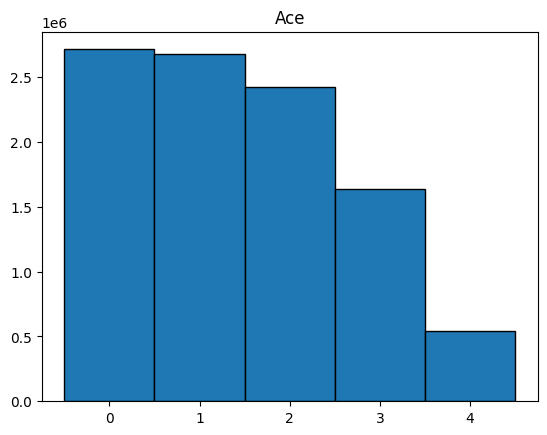

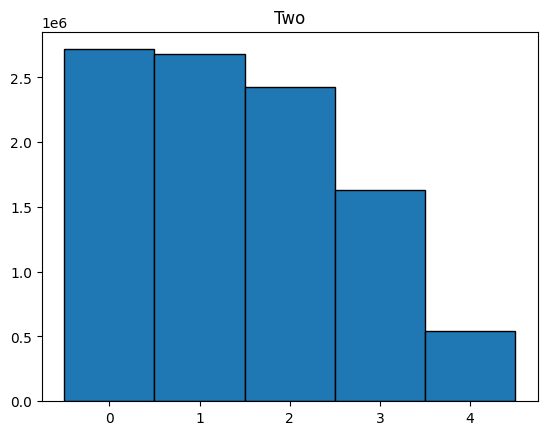

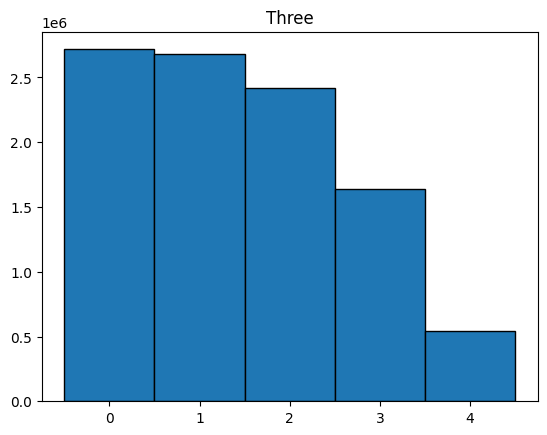

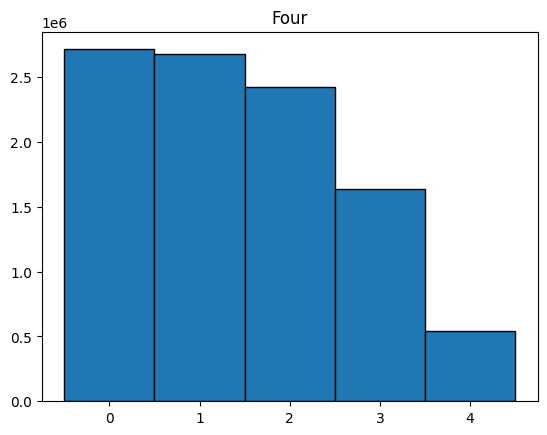

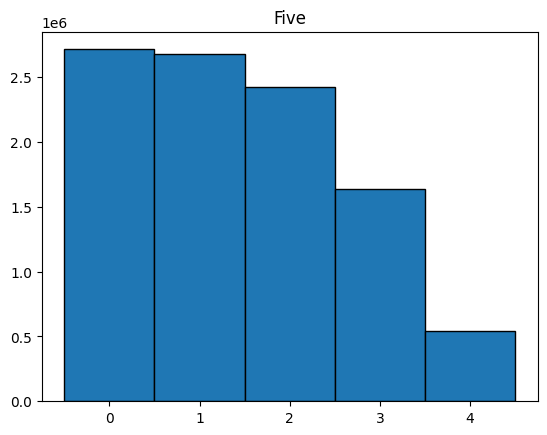

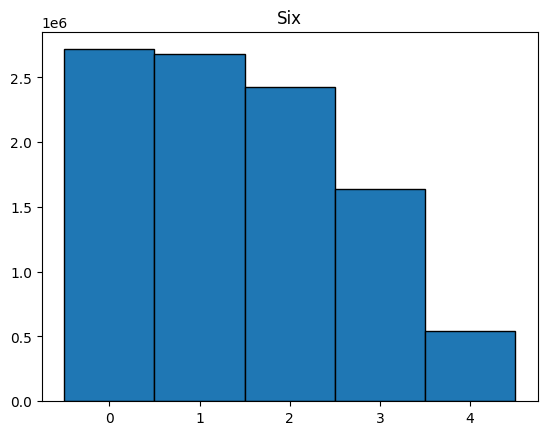

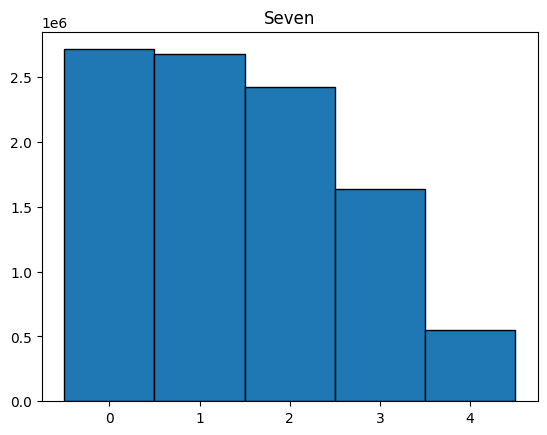

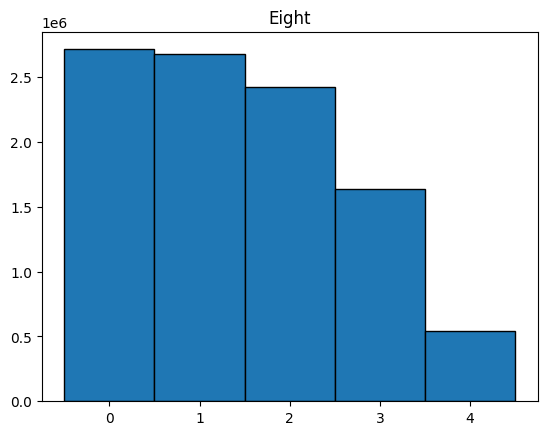

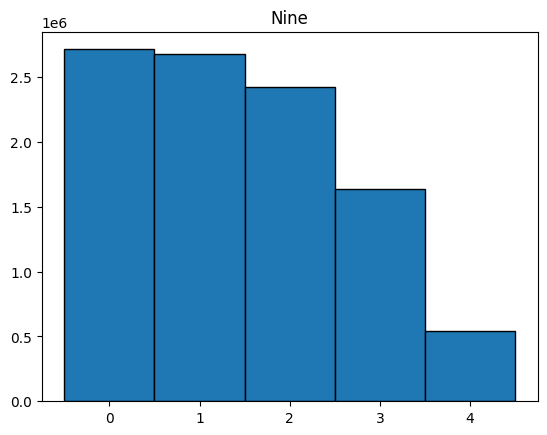

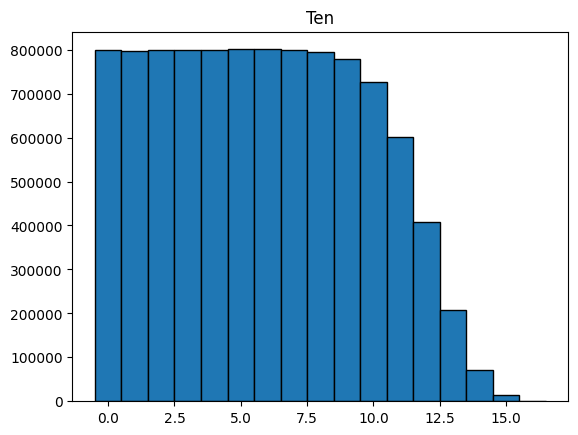

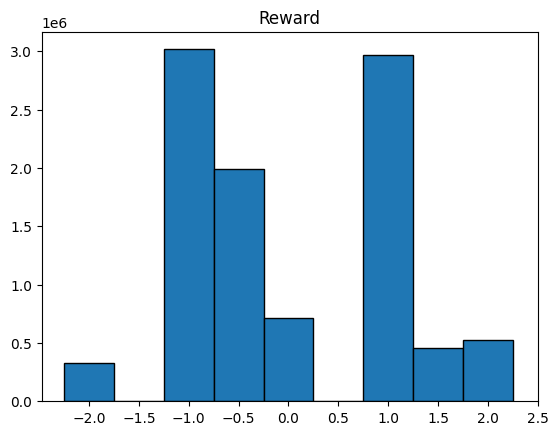

In [3]:
#print histogram of all columns

for i,column in enumerate(dataset.columns):
    plt.figure()
    plt.title(column)
    if i <=8 :
        #center the bins around the integers
        plt.hist(dataset[column], bins=np.arange(dataset[column].min(), dataset[column].max()+2)-0.5, edgecolor='black')
    elif i == 9:
        plt.hist(dataset[column], bins=np.arange(dataset[column].min(), dataset[column].max()+2)-0.5, edgecolor='black')
    else:
        #center around half integers -2.25 to -1.75, -1.75 to -1.25, -1.25 to -0.75, -0.75 to -0.25, -0.25 to 0.25, 0.25 to 0.75, 0.75 to 1.25, 1.25 to 1.75, 1.75 to 2.25
        plt.hist(dataset[column], bins=np.arange(dataset[column].min(), dataset[column].max()+1, 0.5)-0.25, edgecolor='black')
        plt.xticks(np.arange(-2,3,0.5))
    
        


<BarContainer object of 17 artists>

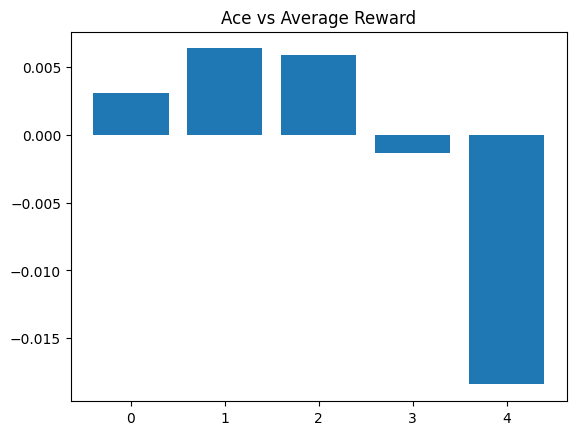

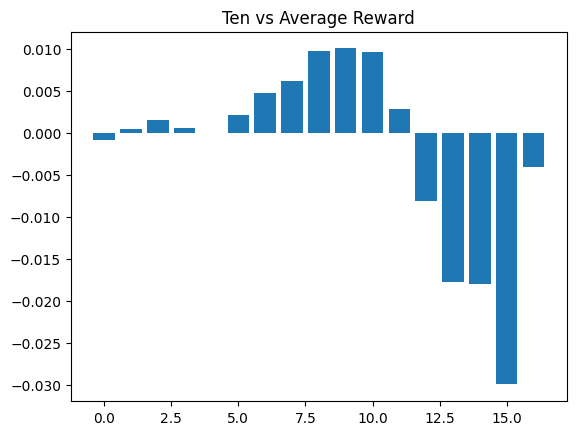

In [4]:
#plot aces against average reward
ace_avg_reward = dataset.groupby('Ace')['Reward'].mean()
tens_avg_reward = dataset.groupby('Ten')['Reward'].mean()

plt.figure()
plt.title('Ace vs Average Reward')
plt.bar(ace_avg_reward.index, ace_avg_reward.values)

plt.figure()
plt.title('Ten vs Average Reward')
plt.bar(tens_avg_reward.index, tens_avg_reward.values)